In [1]:
u = 2
L = 16
nos_internos = 2049
deltaX = (L/(nos_internos-1))
print("DeltaX: ", deltaX)
deltaT = (0.9*deltaX)/u
print("DeltaT: ", deltaT)
Ci = 1/10000
Ce = 1.2
t = 0

c = (u*deltaT)/deltaX
print("c: ", c, "\n")

def pvc(t, deltaT, nos_internos, deltaX, u, Ce, Ci):
    c = (u*deltaT)/deltaX
    tmax = 10*deltaT
    vetorC_antigo = []
    vetorC_novo = []
    
    for p in range(nos_internos+2):
        if(p == 0):
            vetorC_antigo.append(Ce)
            vetorC_novo.append(Ce)
        else:
            vetorC_antigo.append(Ci)
            vetorC_novo.append(Ci)


    while(t<tmax):

        for i in range(1, nos_internos+2):
            vetorC_novo[i] = vetorC_antigo[i] - c*(vetorC_antigo[i]-vetorC_antigo[i-1])

        vetorC_antigo = vetorC_novo

        t+=deltaT

    return vetorC_antigo

resultadoPVC = pvc(t, deltaT, nos_internos, deltaX, u, Ce, Ci)


DeltaX:  0.0078125
DeltaT:  0.003515625
c:  0.9 



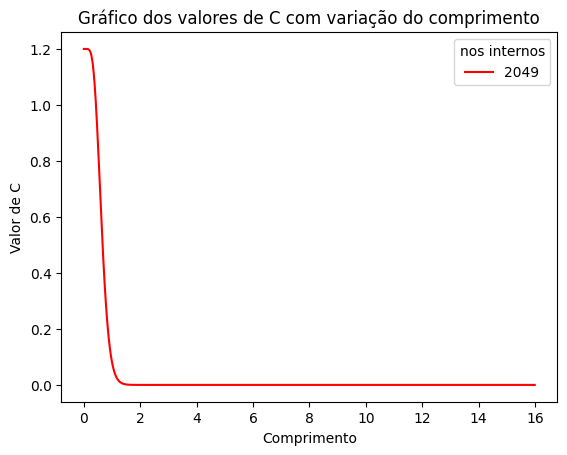

In [2]:
import matplotlib.pyplot as plt

def espaço_interno(nos_interior):
    return L / (nos_interior+2)

vetor_comprimento = [0]
z=0
while z <= nos_internos:
    vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(nos_internos)))
    z += 1

def grafico_PVC(vetorC_antigo):

    plt.title("Gráfico dos valores de C com variação do comprimento")
    cor = ["red", "grey", "purple", "blue", "green"]
    vetorC = pvc(t, deltaT, nos_internos, deltaX, u, Ce, Ci)
    plt.plot(vetor_comprimento, vetorC, color="red", label=nos_internos)

    plt.legend(title="nos internos")
    plt.xlabel("Comprimento")
    plt.ylabel("Valor de C")
    plt.show()

grafico_PVC(resultadoPVC)

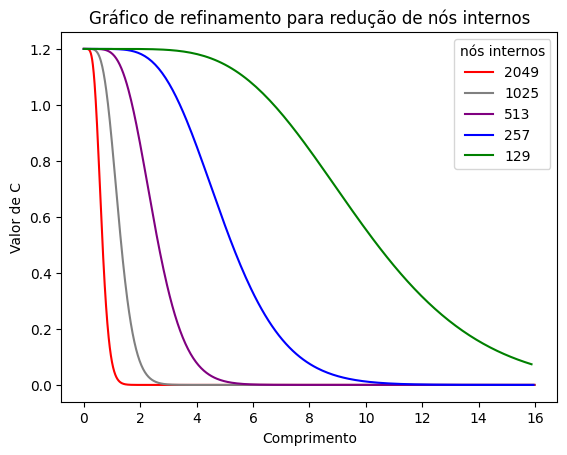

In [3]:
def refinamento():
    vetor_nos_internos = [nos_internos]

    for i in range(0, 4):
        vetor_nos_internos.append(int(((vetor_nos_internos[i]-1)/2)+1))

    for i in range(0, 5):
        vetor_comprimento = [0]

        z = 0
        while z <= vetor_nos_internos[i]:
            vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(vetor_nos_internos[i])))
            z += 1
            
        cor = ["red", "grey", "purple", "blue", "green"]
        resultados_PVC = pvc(t, deltaT, vetor_nos_internos[i], deltaX, u, Ce, Ci)
        plt.title("Gráfico dos valores de C com variação do comprimento")
        plt.plot(vetor_comprimento, resultados_PVC, color=cor[i], label=vetor_nos_internos[i])
        plt.legend(title="nós internos")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")
    
    plt.title("Gráfico de refinamento para redução de nós internos")
    plt.show()


refinamento()


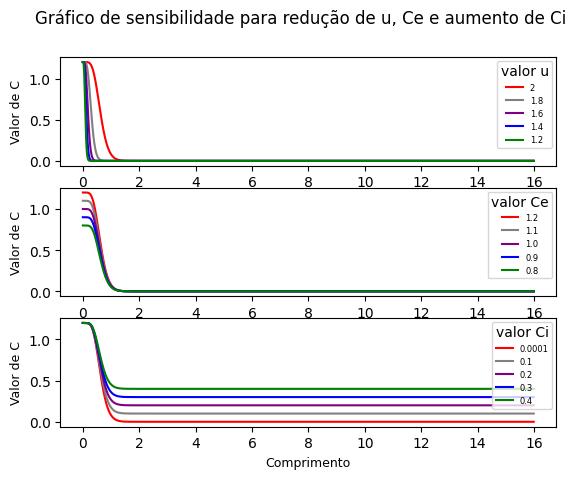

In [4]:

def sensibilidade():
    vetor_u = [u]
    vetor_Ce = [Ce]
    vetor_Ci = [Ci]

    for i in range(0, 4):
        vetor_u.append(round(vetor_u[i]-0.2, 1))
        vetor_Ce.append(round(vetor_Ce[i] - 0.1, 1))
        vetor_Ci.append(round(vetor_Ci[i] + 0.1, 1))

    fig, (grafico_u, grafico_Ce, grafico_Ci) = plt.subplots(3, 1)

    for i in range(0, 5):

        cor = ["red", "grey", "purple", "blue", "green"]
        
        resultados_PVC_u = pvc(t, deltaT, nos_internos, deltaX, vetor_u[i], Ce, Ci)
        grafico_u.plot(vetor_comprimento, resultados_PVC_u, color=cor[i], label=vetor_u[i])
        grafico_u.legend(title="valor u", fontsize=6)
        grafico_u.set_xlabel("Comprimento", fontsize=9)
        grafico_u.set_ylabel("Valor de C", fontsize=9)

        resultados_PVC_Ce = pvc(t, deltaT, nos_internos, deltaX, u, vetor_Ce[i], Ci)
        grafico_Ce.plot(vetor_comprimento, resultados_PVC_Ce, color=cor[i], label=vetor_Ce[i])
        grafico_Ce.legend(title="valor Ce", fontsize=6)
        grafico_Ce.set_xlabel("Comprimento", fontsize=9)
        grafico_Ce.set_ylabel("Valor de C", fontsize=9)

        resultados_PVC_Ci = pvc(t, deltaT, nos_internos, deltaX, u, Ce, vetor_Ci[i])
        grafico_Ci.plot(vetor_comprimento, resultados_PVC_Ci, color=cor[i], label=vetor_Ci[i])
        grafico_Ci.legend(title="valor Ci", fontsize=6)
        grafico_Ci.set_xlabel("Comprimento", fontsize=9)
        grafico_Ci.set_ylabel("Valor de C", fontsize=9)

        

    plt.suptitle("Gráfico de sensibilidade para redução de u, Ce e aumento de Ci")
    plt.show()


sensibilidade()

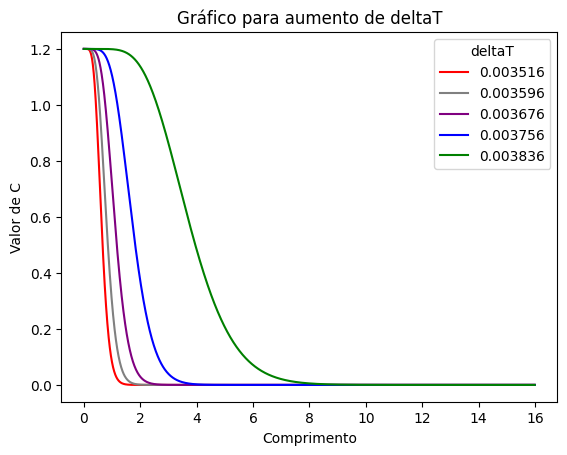

In [5]:
def diferentes_deltaT():
    vetor_deltaT = [deltaT]
    
    for i in range(0, 4):
        vetor_deltaT.append(vetor_deltaT[i]+ 0.00008)
    
    for i in range(0, 5):
        cor = ["red", "grey", "purple", "blue", "green"]
        resultados_PVC = pvc(t, vetor_deltaT[i], nos_internos, deltaX, u, Ce, Ci)
        plt.plot(vetor_comprimento, resultados_PVC, color=cor[i], label=round(vetor_deltaT[i], 6))
        plt.legend(title="deltaT")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico para aumento de deltaT")
    plt.show()


diferentes_deltaT()

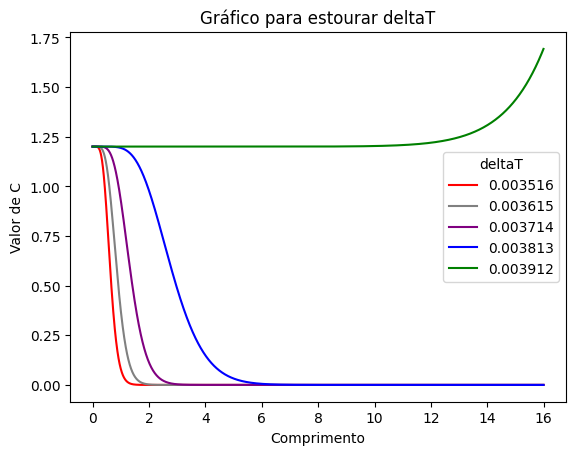

In [6]:
def explode_deltaT():
    vetor_deltaT = [deltaT]
    # A partir de deltaT = 0.003995625 o programa para de funcionar. Logo, a função explode!
    for i in range(0, 4):
        vetor_deltaT.append(vetor_deltaT[i]+ 0.000099)
    
    for i in range(0, 5):
        cor = ["red", "grey", "purple", "blue", "green"]
        resultados_PVC = pvc(t, vetor_deltaT[i], nos_internos, deltaX, u, Ce, Ci)
        plt.plot(vetor_comprimento, resultados_PVC, color=cor[i], label=round(vetor_deltaT[i], 6))
        plt.legend(title="deltaT")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico para estourar deltaT")
    plt.show()


explode_deltaT()